<a href="https://colab.research.google.com/github/Cal-Poly-Data-301/lab-1-phase-2-ajak-cp/blob/main/DATA_301_Lab_1A_Ava_Jakusovszky_%26_Michael_Greene_(phase_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Distribution of First Digits

In this lab, you will explore the distribution of first digits in real data. For example, the first digits of the numbers 52, 30.8, and 0.07 are 5, 3, and 7 respectively. In this lab, you will investigate the question: how frequently does each digit 1-9 appear as the first digit of the number?

## Question 0

Make a prediction. 

1. Approximately what percentage of the values do you think will have a _first_ digit of 1? What percentage of the values do you think will have a first digit of 9?

11.1%, each digit has a 1/9 chance. Based on the .07 example, 0 can never be the first digit, so the options are 1-9.


2. Approximately what percentage of the values do you think will have a _last_ digit of 1? What percentage of the values do you think will have a last digit of 9?

10%, each digit has a 1/10 chance because the last digit can be 0-9.


(Don't worry about being wrong. You will earn full credit for any justified answer.)

## Question 1

The [S&P 500](https://en.wikipedia.org/wiki/S%26P_500_Index) is a stock index based on the market capitalizations of large companies that are publicly traded on the NYSE or NASDAQ. The CSV file (https://dlsun.github.io/pods/data/sp500.csv) contains data from February 1, 2018 about the stocks that comprise the S&P 500. We will investigate the first digit distributions of the variables in this data set.

Read in the S&P 500 data. What is the unit of observation in this data set? Is there a variable that is natural to use as the index? If so, set that variable to be the index. Once you are done, display the `DataFrame`.

In [ ]:
import pandas as pd

data_dir = "https://dlsun.github.io/pods/data/"
df_stonks = pd.read_csv(data_dir + "sp500.csv")
df_stonks.head()
df_stonks.set_index(["Name"], inplace=True)
df_stonks.head()

,date,open,close,volume
Name,,,,
AAL,2018-02-01,$54.00,$53.88,3623078
AAPL,2018-02-01,$167.16,$167.78,47230787
AAP,2018-02-01,$116.24,$117.29,760629
ABBV,2018-02-01,$112.24,$116.34,9943452
ABC,2018-02-01,$97.74,$99.29,2786798


The unit of observation is stocks on Feb. 1st 2018.

The best index to use is the name because price, volume, and date can all be repeated, but names of stock must be unique.

## Question 2

We will start by looking at the `volume` column. This variable tells us how many shares were traded on that date.

Extract the first digit of every value in this column. (_Hint:_ First, turn the numbers into strings. Then, use the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` to extract the first character of each string.) Make an appropriate visualization to display the distribution of the first digits. (_Hint:_ Think carefully about whether the variable you are plotting is quantitative or categorical.)

How does this compare with what you predicted in Question 0?

There are some outliers between my data and the predictions, but a lot of them for the later examples are very similar, the frequency of 1 is very high, but for the most part they seem to be close. 

In [ ]:
df_stonks["volume_fdigit"].value_counts()

1    165
2     93
3     59
4     43
5     41
6     36
7     25
8     22
9     21
Name: volume_fdigit, dtype: int64

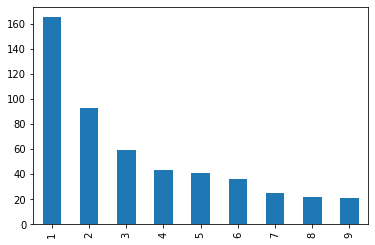

In [ ]:
df_stonks.volume.astype(str).str[0].value_counts().sort_index().plot.bar()

The 0 index of the volume column is the digit we are looking for. The value counts function gives us how many times each first digit option is seen in the data.

## Question 3

Now, repeat Question 2, but for the distribution of _last_ digits. Again, make an appropriate visualization and compare with your prediction in Question 0.

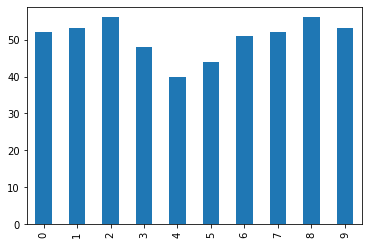

In [ ]:
df_stonks.volume.astype(str).str[-1].value_counts().sort_index().plot.bar()

The distribution of the last digit matches my prediction much more accurately.

## Question 4

Maybe the `volume` column was just a fluke. Let's see if the first digit distribution holds up when we look at a very different variable: the closing price of the stock. Make a visualization of the first digit distribution of the closing price (the `close` column of the `DataFrame`). Comment on what you see.

(_Hint:_ What type did `pandas` infer this variable as and why? You will have to first clean the values using the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` and then convert this variable to a quantitative variable.)

Similar process as previous questions, but from a different category. Steps also more drawn out, but method above would work as well.

In [ ]:
df_stonks["close"] = df_stonks["close"].astype(str)
df_stonks["close_fdigit"] = df_stonks["close"].str[1].astype(int)
df_close_f = df_stonks["close_fdigit"]
df_close_f.value_counts()

1    171
2     55
3     52
6     48
7     43
4     43
5     39
8     28
9     26
Name: close_fdigit, dtype: int64

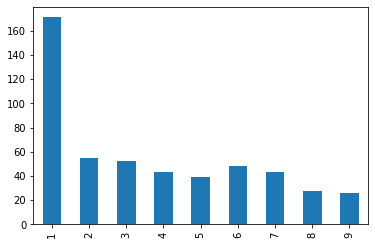

In [ ]:
df_close_f.value_counts().sort_index().plot.bar()

It looks very similar to the first digit distribution of the volume column. However, the digits above 1 are much more flatly distributed and some higher digits are slightly more frequent than lower ones, unlike the volume column.